# Importing libraries

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import skimage
from tensorflow import keras
from skimage import transform
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import threshold_mean
from tqdm import tqdm

# Functions

In [0]:
def plot(a,ix,iy):
    a=a.reshape(ix,iy)
    plt.imshow(a,cmap='viridis')
    plt.axis('off')
    
def imageprepare(image,ix,iy):
  image=resize(image,(ix,iy),mode='reflect')
  image=(image>threshold_mean(image))*2-1
  image=np.reshape(image,ix*iy)
  return image

# Image preparation

In [0]:
# Image size : ix*iy
ix=128
iy=128

it=1 # Number of iterations

# Loading images
camera = skimage.data.camera()
astronaut = rgb2gray(skimage.data.astronaut())
data=[camera, astronaut]

datatest=[]
for i in range(len(data)):
    datatest.append(skimage.util.random_noise(data[i], mode='gaussian',clip=False,var=0.5))

train=[]
test=[]
for i in range(len(data)):
  train.append(imageprepare(data[i],ix,iy))
  test.append(imageprepare(datatest[i],ix,iy))

train=np.array(train)
test=np.array(test)  

num_data =  len(train)
num_neuron = train[0].shape[0]

# Weight initialization

In [0]:
w=np.zeros([num_neuron,num_neuron])
rho=sum(sum(train))/(num_neuron*num_data)

for i in tqdm(range(len(train))):
    imag=train[i]-rho
    w+=np.einsum('i,j->ij',imag,imag) # for example: image zero, image one, keep consistency
diagW = np.diag(np.diag(w))
w = w - diagW
w /= num_data

100%|██████████| 2/2 [00:02<00:00,  1.46s/it]


# Network test

100%|██████████| 2/2 [00:00<00:00,  5.39it/s]


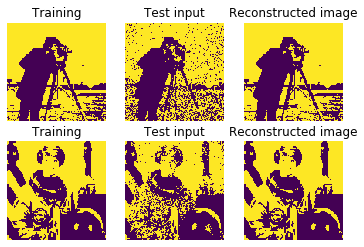

In [0]:
out=[]

for i in tqdm(range(len(test))):
    testr=np.copy(test[i])
    for j in range(it):
        testr=np.sign(w@testr)
    out.append(testr)

out=np.array(out)

for i in range(len(test)):
    plt.subplot(len(test),3,3*i+1);plot(train[i],ix,iy);plt.title('Training')
    plt.subplot(len(test),3,3*i+2);plot(test[i],ix,iy);plt.title('Test input')
    plt.subplot(len(test),3,3*i+3);plot(out[i],ix,iy);plt.title('Reconstructed image')

In [0]:
# Loading data
mnist=keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
index = []
for i in range(9):
  index.append(np.where(train_labels==i)[0][0])
train_images = train_images[index]>0

## Course Work 3

## Training and Test Data

In [0]:
# create training data shaped in 84*84
traindata = np.empty((9,84,84))
for i in range(3):
  base = np.ones((84,84))
  base[i*28:i*28+28,0:28]=train_images[i]
  traindata[i] = base
for i in range(3):
  base = np.ones((84,84))
  base[i*28:i*28+28,28:56]=train_images[i+3]
  traindata[i+3] = base
for i in range(3):
  base = np.ones((84,84))
  base[i*28:i*28+28,56:84]=train_images[i+6]
  traindata[i+6] = base

# add noise to the training data
testdata = np.empty((9,84,84))
for i in range(traindata.shape[0]):
    testdata[i] = skimage.util.random_noise(traindata[i], mode='gaussian',clip=False,var=0.5)


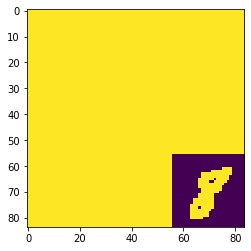

In [0]:
plt.imshow(traindata[8],cmap='viridis')

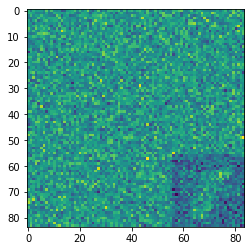

In [0]:
plt.imshow(testdata[8],cmap='viridis')

In [0]:
def imageprepare2(image):
  image=(image>threshold_mean(image))*2-1
  image=np.reshape(image,image.shape[0]*image.shape[1])
  return image

In [0]:
# convert the value of train and test data to {1,-1} and change them into vector form
train=np.empty((9,84*84))
test=np.empty((9,84*84))
for i in range(len(traindata)):
  train[i] = imageprepare2(traindata[i])
  test[i] = imageprepare2(testdata[i])

num_data =  train.shape[0]
num_neuron = train[0].shape[0]

In [0]:
# weight initiallization for task1
imag = np.empty((9,84*84))
w=np.zeros([num_neuron,num_neuron])
rho=sum(sum(train))/(num_neuron*num_data)
for i in tqdm(range(len(train))):
    imag[i]=train[i]-rho
    w+=np.einsum('i,j->ij',imag[i],imag[i]) 
diagW = np.diag(np.diag(w))
w = w - diagW
w /= num_data

100%|██████████| 9/9 [00:01<00:00,  5.83it/s]


100%|██████████| 9/9 [00:00<00:00, 27.73it/s]


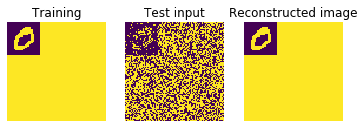

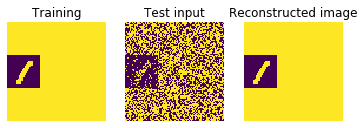

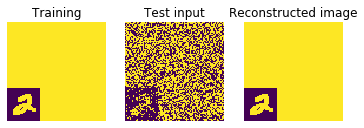

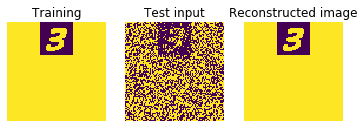

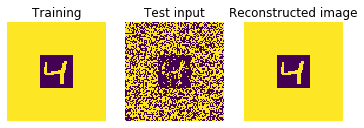

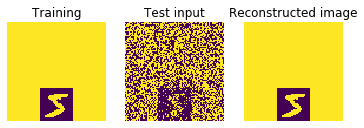

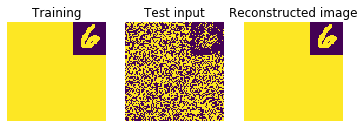

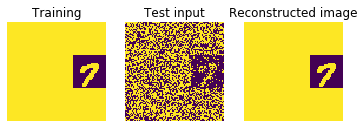

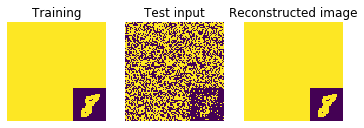

In [0]:
# network test for task 1
out=[]

for i in tqdm(range(len(test))):
    testr=np.copy(test[i])
    for j in range(it):
        testr=np.sign(w@testr)
    out.append(testr)

out=np.array(out)

for i in range(len(test)):
    fig = plt.figure()
    plt.subplot(1,3,1);plot(train[i],84,84);plt.title('Training')
    plt.subplot(1,3,2);plot(test[i],84,84);plt.title('Test input')
    plt.subplot(1,3,3);plot(out[i],84,84);plt.title('Reconstructed image')
    plt.show()

In [0]:
# weight initiallization for task2
imag = np.empty((9,84*84))
w=np.zeros([num_neuron,num_neuron])
rho=sum(sum(train))/(num_neuron*num_data)
for i in tqdm(range(len(train))):
    imag[i]=train[i]-rho
    if i > 0:
      w+=np.einsum('i,j->ij',imag[i],imag[i-1])
    else:
      w+=np.einsum('i,j->ij',imag[i],imag[8])
diagW = np.diag(np.diag(w))
w = w - diagW
w /= num_data

100%|██████████| 9/9 [00:01<00:00,  5.70it/s]


100%|██████████| 9/9 [00:00<00:00, 26.91it/s]


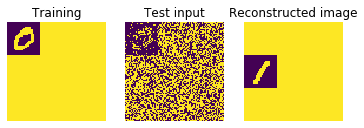

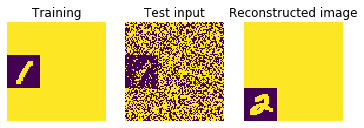

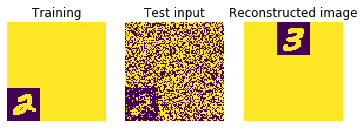

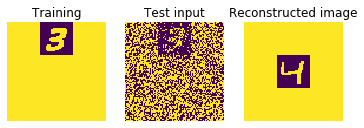

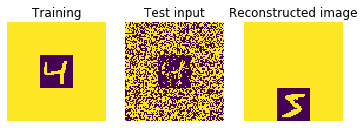

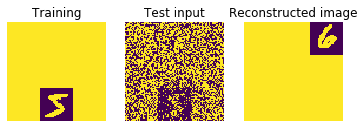

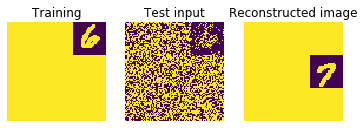

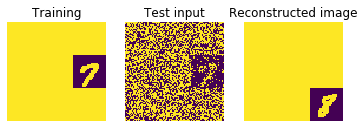

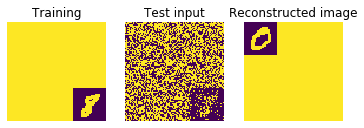

In [0]:
# network test for task 2
out=[]

for i in tqdm(range(len(test))):
    testr=np.copy(test[i])
    for j in range(it):
        testr=np.sign(w@testr)
    out.append(testr)

out=np.array(out)

for i in range(len(test)):
    fig = plt.figure()
    plt.subplot(1,3,1);plot(train[i],84,84);plt.title('Training')
    plt.subplot(1,3,2);plot(test[i],84,84);plt.title('Test input')
    plt.subplot(1,3,3);plot(out[i],84,84);plt.title('Reconstructed image')
    plt.show()